* Nama : Irhas Candra Sagita
* email : irhascs@gmail.com
* Alamat : Jl. Mawar 0 blok D4 No. 2 RT01/RW27 Perum PTM Kel. Wanasari, Kec. Cibitung, Kab. Bekasi 17520
* Saat ini bekerja sebagai Staff Logistik di PT. Saranagriya Lestari Keramik






Di dalam tugas ini berisi program jaringan saraf tiruan menggunakan TensorFlow yang bertujuan untuk mengenali bentuk tangan yang membentuk gunting, batu atau kertas

Pertama install library split folder

In [1]:
!pip install split-folders

lalu kita download dataset yang dibutuhkan

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-26 13:10:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.61MB/s    in 72s     

2021-07-26 13:11:55 (4.30 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Import library TensorFlow


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

Mengekstrak dataset yang sudah didownload

In [4]:
import zipfile,os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Membuat direktori utama

In [5]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [6]:
base_dir

'/tmp/rockpaperscissors/rps-cv-images'

In [7]:
os.listdir(base_dir)

['scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

Membagi data training dan data validation dengan persentase 40%, serta proses augmentasi gambar

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range = 30, 
    shear_range = 0.2, 
    horizontal_flip = True,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.4
    ) 

test_datagen = ImageDataGenerator(
    rescale=1./255, 
    #zoom_range = 0.2, 
    #shear_range = 0.2, 
    #horizontal_flip = True,
    validation_split = 0.4
    )

train_generator = train_datagen.flow_from_directory(
    base_dir, 
    target_size = (100, 150),  
    batch_size = 32,
    subset = 'training',
    class_mode = 'categorical'
    )

validation_generator = test_datagen.flow_from_directory(
    base_dir, 
    target_size=(100, 150),
    batch_size = 32,
    subset='validation',
    class_mode = 'categorical'
    )


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Membuat arsitektur CNN :
* Layer Convolusion untuk mengekstrak atribut pada gambar
* Max Pooling untuk mereduksi resolusi gambar



In [10]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,150,3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),


                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

Menggunakan fungsi ```compile``` pada model dan menentukan ```loss object``` serta ```optimizer```



In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 256)        2

melatih model menggunakan metode ```fit```

In [14]:
train = model.fit(
    train_generator,
    steps_per_epoch = 25, 
    epochs = 25, 
    validation_data = validation_generator, 
    validation_steps = 5, 
    verbose = 2
    )

Epoch 1/25
25/25 - 30s - loss: 1.0848 - accuracy: 0.4117 - val_loss: 1.0556 - val_accuracy: 0.3250
Epoch 2/25
25/25 - 29s - loss: 0.8100 - accuracy: 0.6182 - val_loss: 0.5859 - val_accuracy: 0.6625
Epoch 3/25
25/25 - 29s - loss: 0.5317 - accuracy: 0.7909 - val_loss: 0.5290 - val_accuracy: 0.7937
Epoch 4/25
25/25 - 29s - loss: 0.4027 - accuracy: 0.8587 - val_loss: 0.3253 - val_accuracy: 0.9062
Epoch 5/25
25/25 - 29s - loss: 0.3723 - accuracy: 0.8714 - val_loss: 0.7219 - val_accuracy: 0.8250
Epoch 6/25
25/25 - 29s - loss: 0.2704 - accuracy: 0.9013 - val_loss: 0.1980 - val_accuracy: 0.9438
Epoch 7/25
25/25 - 29s - loss: 0.2398 - accuracy: 0.9175 - val_loss: 0.1710 - val_accuracy: 0.9375
Epoch 8/25
25/25 - 29s - loss: 0.2277 - accuracy: 0.9262 - val_loss: 0.1827 - val_accuracy: 0.9563
Epoch 9/25
25/25 - 28s - loss: 0.1772 - accuracy: 0.9377 - val_loss: 0.1367 - val_accuracy: 0.9563
Epoch 10/25
25/25 - 29s - loss: 0.2173 - accuracy: 0.9225 - val_loss: 0.0958 - val_accuracy: 0.9750
Epoch 11/

Evaluasi akurasi dan loss dari model yang dibuat

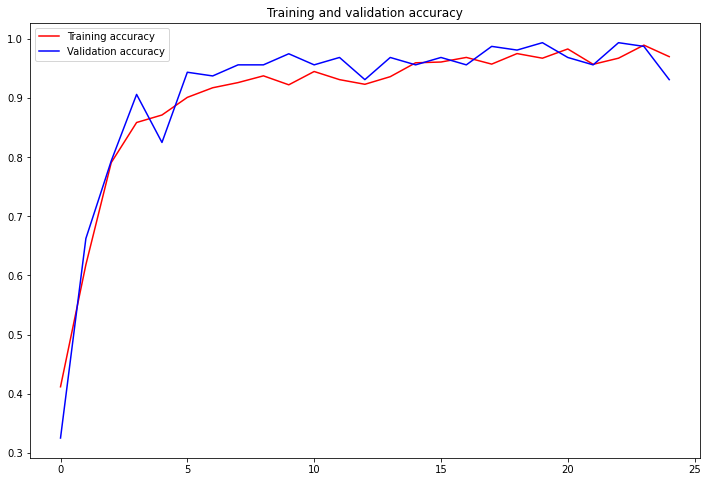

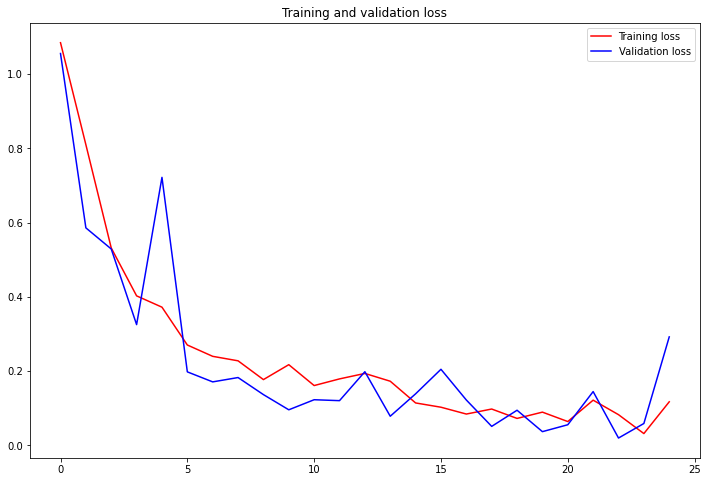

In [15]:
import matplotlib.pyplot as plt

acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs_acc = range(len(acc))
plt.figure(figsize=(12,8))
plt.plot(epochs_acc, acc, 'r', label='Training accuracy')
plt.plot(epochs_acc, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

epochs_loss = range(len(loss))
plt.figure(figsize=(12,8))
plt.plot(epochs_loss, loss, 'r', label='Training loss')
plt.plot(epochs_loss, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

Implementasi augmentasi gambar

Saving batu_b-removebg-preview.png to batu_b-removebg-preview.png
batu_b-removebg-preview.png
rock
Probability:  100.0 %


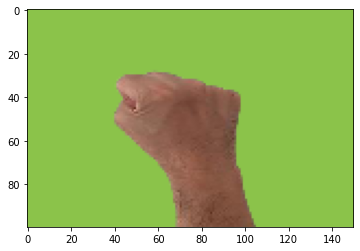

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  outclass = np.argmax(classes)
  probability = sorted(model.predict(images)[0])[2]

  print(fn)
  if outclass == 0:
    print('paper')
  elif outclass == 1:
    print('rock')
  else:
    print('scissors')
  print("Probability: ", round(probability*100,2), "%")